# Robustness and Optimization Analysis 

In [4]:
import os
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from typing import Tuple, List, Dict

# File paths
graph_file_path = "/Users/xuzhixuan/Desktop/NS/Final/1week_bike_network.gml"
trip_data_path = "/Users/xuzhixuan/Desktop/NS/Final/202004-divvy-tripdata.csv"

# Load data
graph = nx.read_gml(graph_file_path)
trip_data = pd.read_csv(trip_data_path)


# 1. Network Robustness Analysis

## 1.1 Identify Critical Nodes

In [5]:
# Calculate betweenness centrality for identifying critical nodes
betweenness_centrality = nx.betweenness_centrality(graph)

# Get top 10 critical nodes based on betweenness centrality
top_10_nodes = sorted(betweenness_centrality.items(), 
                     key=lambda item: item[1], 
                     reverse=True)[:10]
critical_nodes = [node for node, _ in top_10_nodes]

# Display critical nodes
critical_nodes_df = pd.DataFrame(top_10_nodes, 
                               columns=["Node", "Betweenness Centrality"])
print("Top 10 Critical Nodes:")
print(critical_nodes_df)

Top 10 Critical Nodes:
                         Node  Betweenness Centrality
0   Wabash Ave & Roosevelt Rd                0.050196
1         Ellis Ave & 53rd St                0.045845
2      Green St & Randolph St                0.043047
3       Kimbark Ave & 53rd St                0.037681
4  Indiana Ave & Roosevelt Rd                0.027533
5        Paulina St & 18th St                0.024440
6         Troy St & North Ave                0.022405
7     Lake Park Ave & 56th St                0.022212
8  Franklin St & Jackson Blvd                0.022199
9       Green St & Madison St                0.020052


## 1.2 Simulate Network Failure

In [6]:
# Create a copy of the graph and remove critical nodes
graph_after_removal = graph.copy()
graph_after_removal.remove_nodes_from(critical_nodes)

# Calculate network metrics before and after node removal
original_largest_component = max(nx.connected_components(graph.to_undirected()), 
                               key=len)
after_removal_largest_component = max(nx.connected_components(
                                    graph_after_removal.to_undirected()), 
                                    key=len)
original_efficiency = nx.global_efficiency(graph.to_undirected())
after_removal_efficiency = nx.global_efficiency(graph_after_removal.to_undirected())

# Display results
print("Original Network Metrics:")
print(f"Largest Component Size: {len(original_largest_component)}")
print(f"Global Efficiency: {original_efficiency:.4f}")

print("\nMetrics After Critical Node Removal:")
print(f"Largest Component Size: {len(after_removal_largest_component)}")
print(f"Global Efficiency: {after_removal_efficiency:.4f}")

Original Network Metrics:
Largest Component Size: 567
Global Efficiency: 0.3832

Metrics After Critical Node Removal:
Largest Component Size: 557
Global Efficiency: 0.3719


## 1.3 Visualize Network Changes

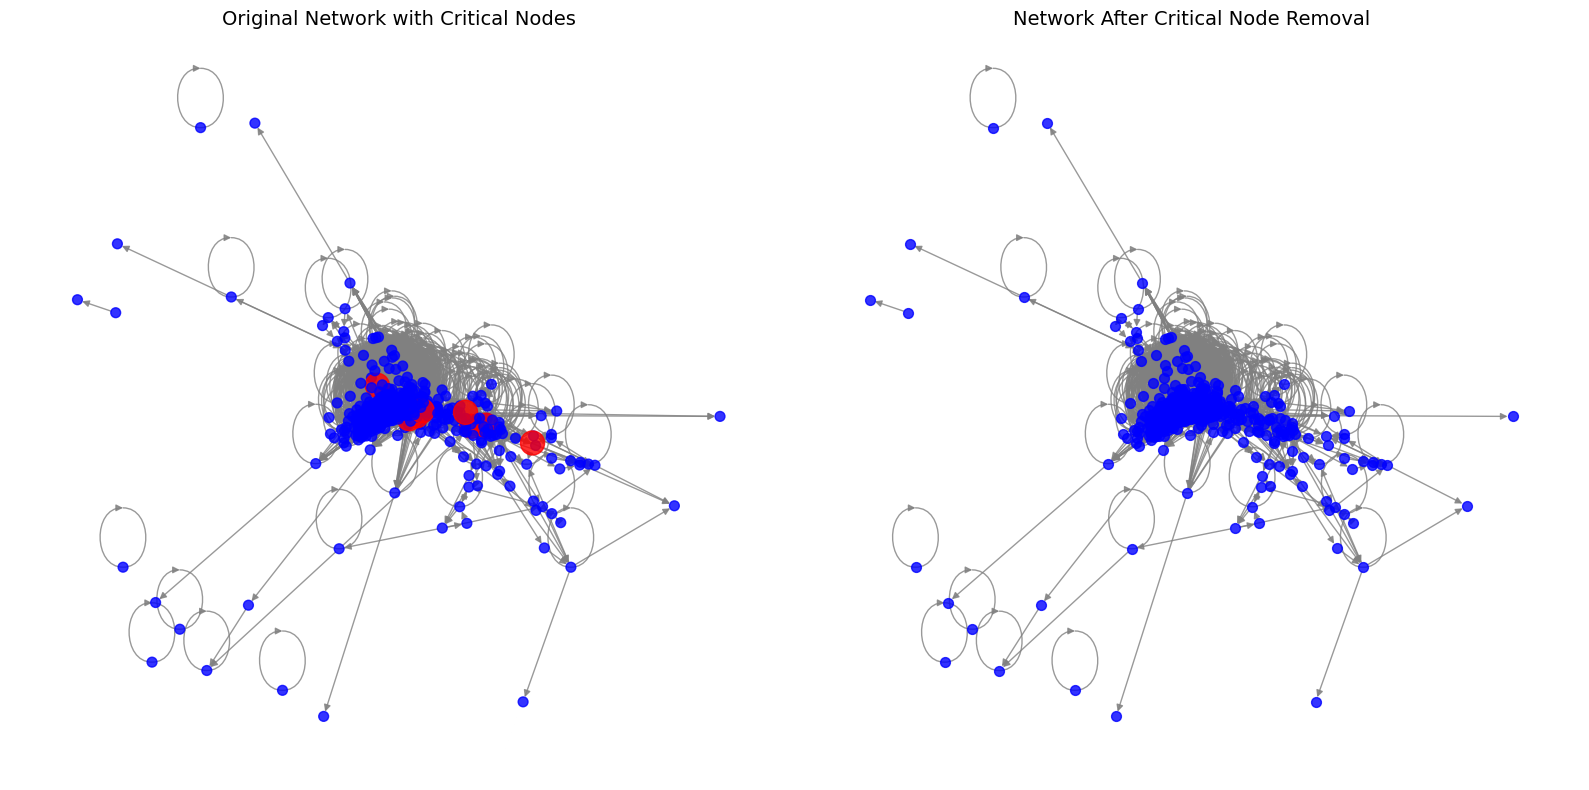

In [7]:
def visualize_network_changes(graph, modified_graph, critical_nodes):
    """
    Visualize original and modified network side by side
    """
    plt.figure(figsize=(16, 8))
    
    # Plot original network
    plt.subplot(1, 2, 1)
    pos = nx.spring_layout(graph, seed=42)
    node_colors = ["red" if node in critical_nodes else "blue" 
                   for node in graph.nodes()]
    node_sizes = [300 if node in critical_nodes else 50 
                  for node in graph.nodes()]
    nx.draw(graph, pos, node_color=node_colors, node_size=node_sizes,
            edge_color="gray", with_labels=False, alpha=0.8)
    plt.title("Original Network with Critical Nodes", fontsize=14)
    
    # Plot modified network
    plt.subplot(1, 2, 2)
    nx.draw(modified_graph, pos, node_color="blue", node_size=50,
            edge_color="gray", with_labels=False, alpha=0.8)
    plt.title("Network After Critical Node Removal", fontsize=14)
    
    plt.tight_layout()
    plt.show()

visualize_network_changes(graph, graph_after_removal, critical_nodes)

/var/folders/ss/d266z7jd1vg00ngknmwb3lsw0000gn/T/ipykernel_13034/1401042845.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


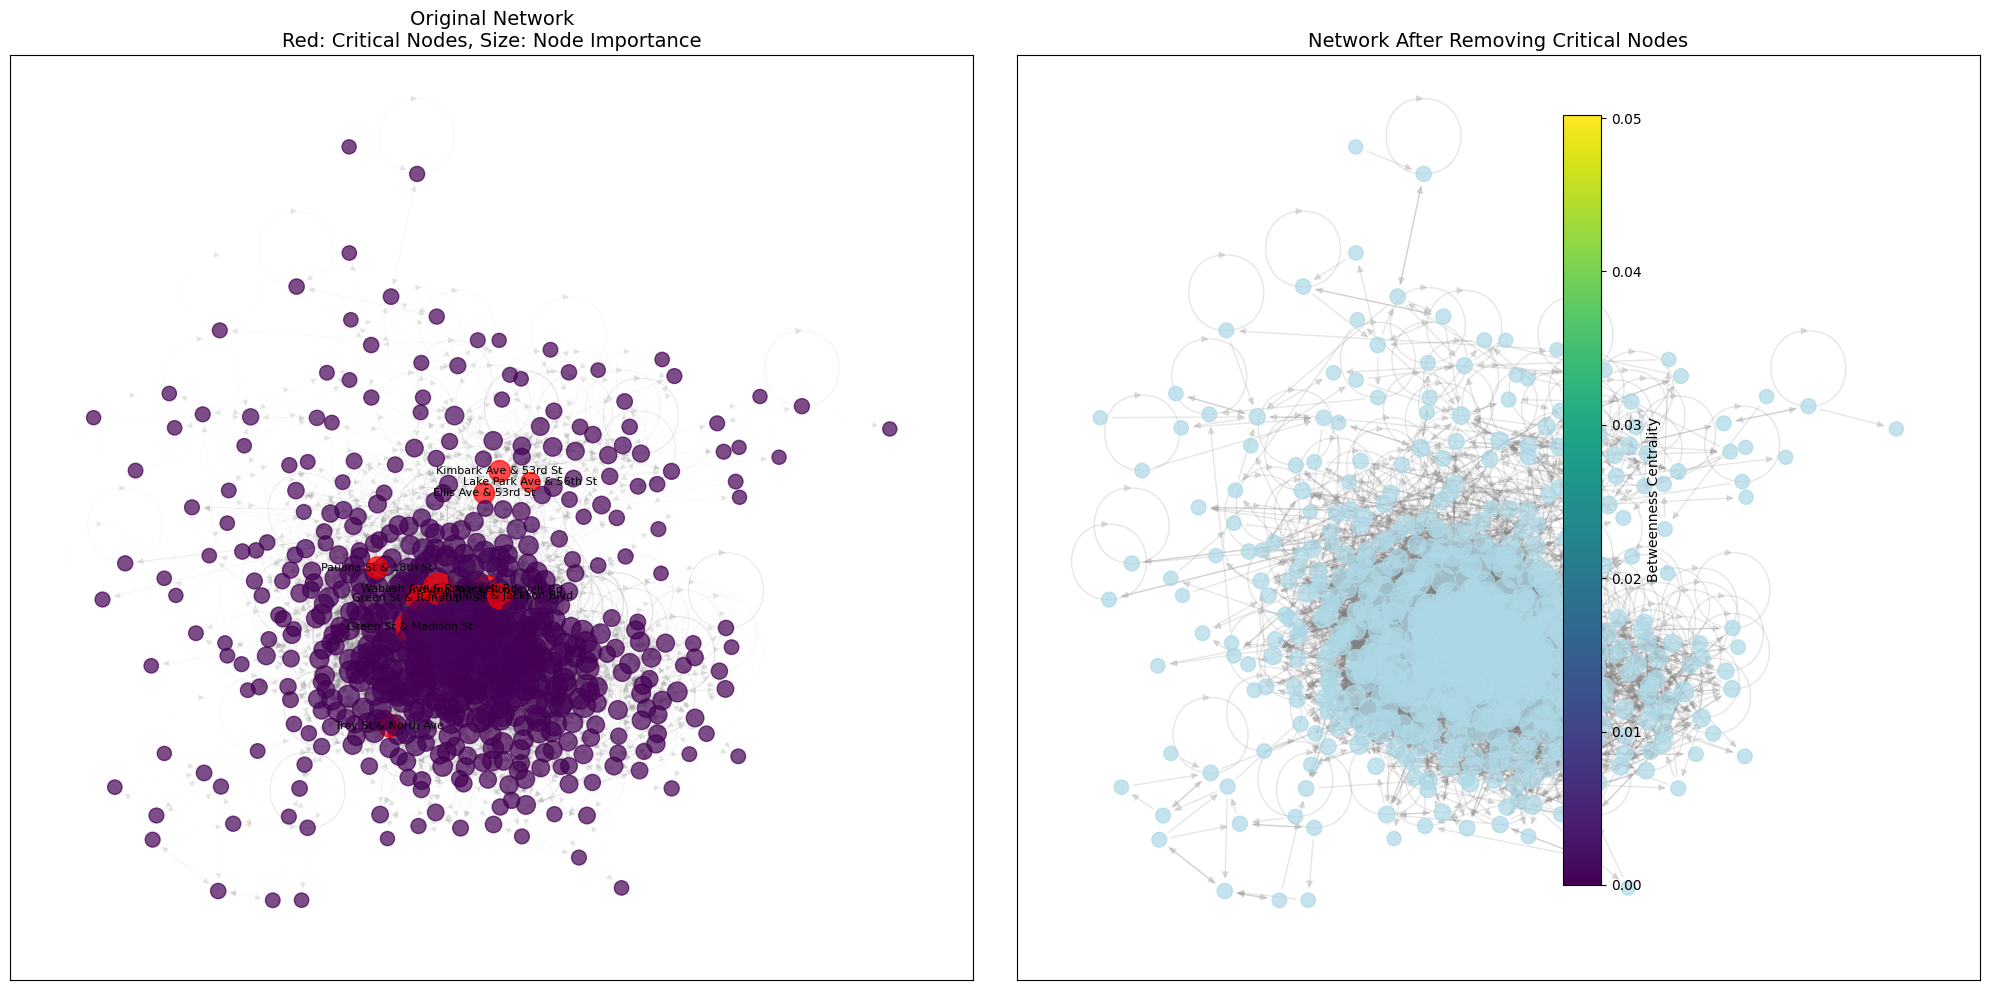

In [9]:
def visualize_network_changes(graph, modified_graph, critical_nodes):
    """
    Enhanced visualization comparing original and modified network
    """
    fig = plt.figure(figsize=(20, 10))
    
    # Calculate network metrics
    degree_centrality = nx.degree_centrality(graph)
    betweenness_centrality = nx.betweenness_centrality(graph)
    
    # Use Kamada-Kawai layout
    pos = nx.kamada_kawai_layout(graph)
    
    # Plot original network
    ax1 = plt.subplot(1, 2, 1)
    
    # Edge weights
    edge_weights = [graph[u][v].get('weight', 1) for u, v in graph.edges()]
    max_weight = max(edge_weights) if edge_weights else 1
    normalized_weights = [w/max_weight * 2 for w in edge_weights]
    
    # Node sizes
    node_sizes = [2000 * degree_centrality[node] + 100 for node in graph.nodes()]
    
    # Node colors
    node_colors = []
    for node in graph.nodes():
        if node in critical_nodes:
            node_colors.append('red')
        else:
            node_colors.append(plt.cm.viridis(betweenness_centrality[node]))
    
    # Draw original network
    nx.draw_networkx_edges(graph, pos, alpha=0.2, 
                          width=normalized_weights, 
                          edge_color='gray')
    nodes = nx.draw_networkx_nodes(graph, pos, 
                                 node_size=node_sizes,
                                 node_color=node_colors,
                                 alpha=0.7)
    
    # Labels for critical nodes
    labels = {node: node for node in critical_nodes}
    nx.draw_networkx_labels(graph, pos, labels, font_size=8)
    
    plt.title("Original Network\nRed: Critical Nodes, Size: Node Importance", 
              fontsize=14)
    
    # Plot modified network
    ax2 = plt.subplot(1, 2, 2)
    
    # Modified network metrics
    mod_degree_centrality = nx.degree_centrality(modified_graph)
    mod_node_sizes = [2000 * mod_degree_centrality[node] + 100 
                     for node in modified_graph.nodes()]
    
    nx.draw_networkx_edges(modified_graph, pos, alpha=0.2,
                          edge_color='gray')
    nx.draw_networkx_nodes(modified_graph, pos,
                          node_size=mod_node_sizes,
                          node_color='lightblue',
                          alpha=0.7)
    
    plt.title("Network After Removing Critical Nodes", fontsize=14)
    
    # Add colorbar
    norm = plt.Normalize(min(betweenness_centrality.values()), 
                        max(betweenness_centrality.values()))
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=[ax1, ax2], label='Betweenness Centrality')
    
    plt.tight_layout()
    return fig

# 使用函数
fig = visualize_network_changes(graph, graph_after_removal, critical_nodes)
plt.show()

Network Statistics:
Total Stations: 574
Total Routes: 9479
Total Trips: 16027

Visualization will show top 100 stations by traffic


/var/folders/ss/d266z7jd1vg00ngknmwb3lsw0000gn/T/ipykernel_13034/2630460941.py:101: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


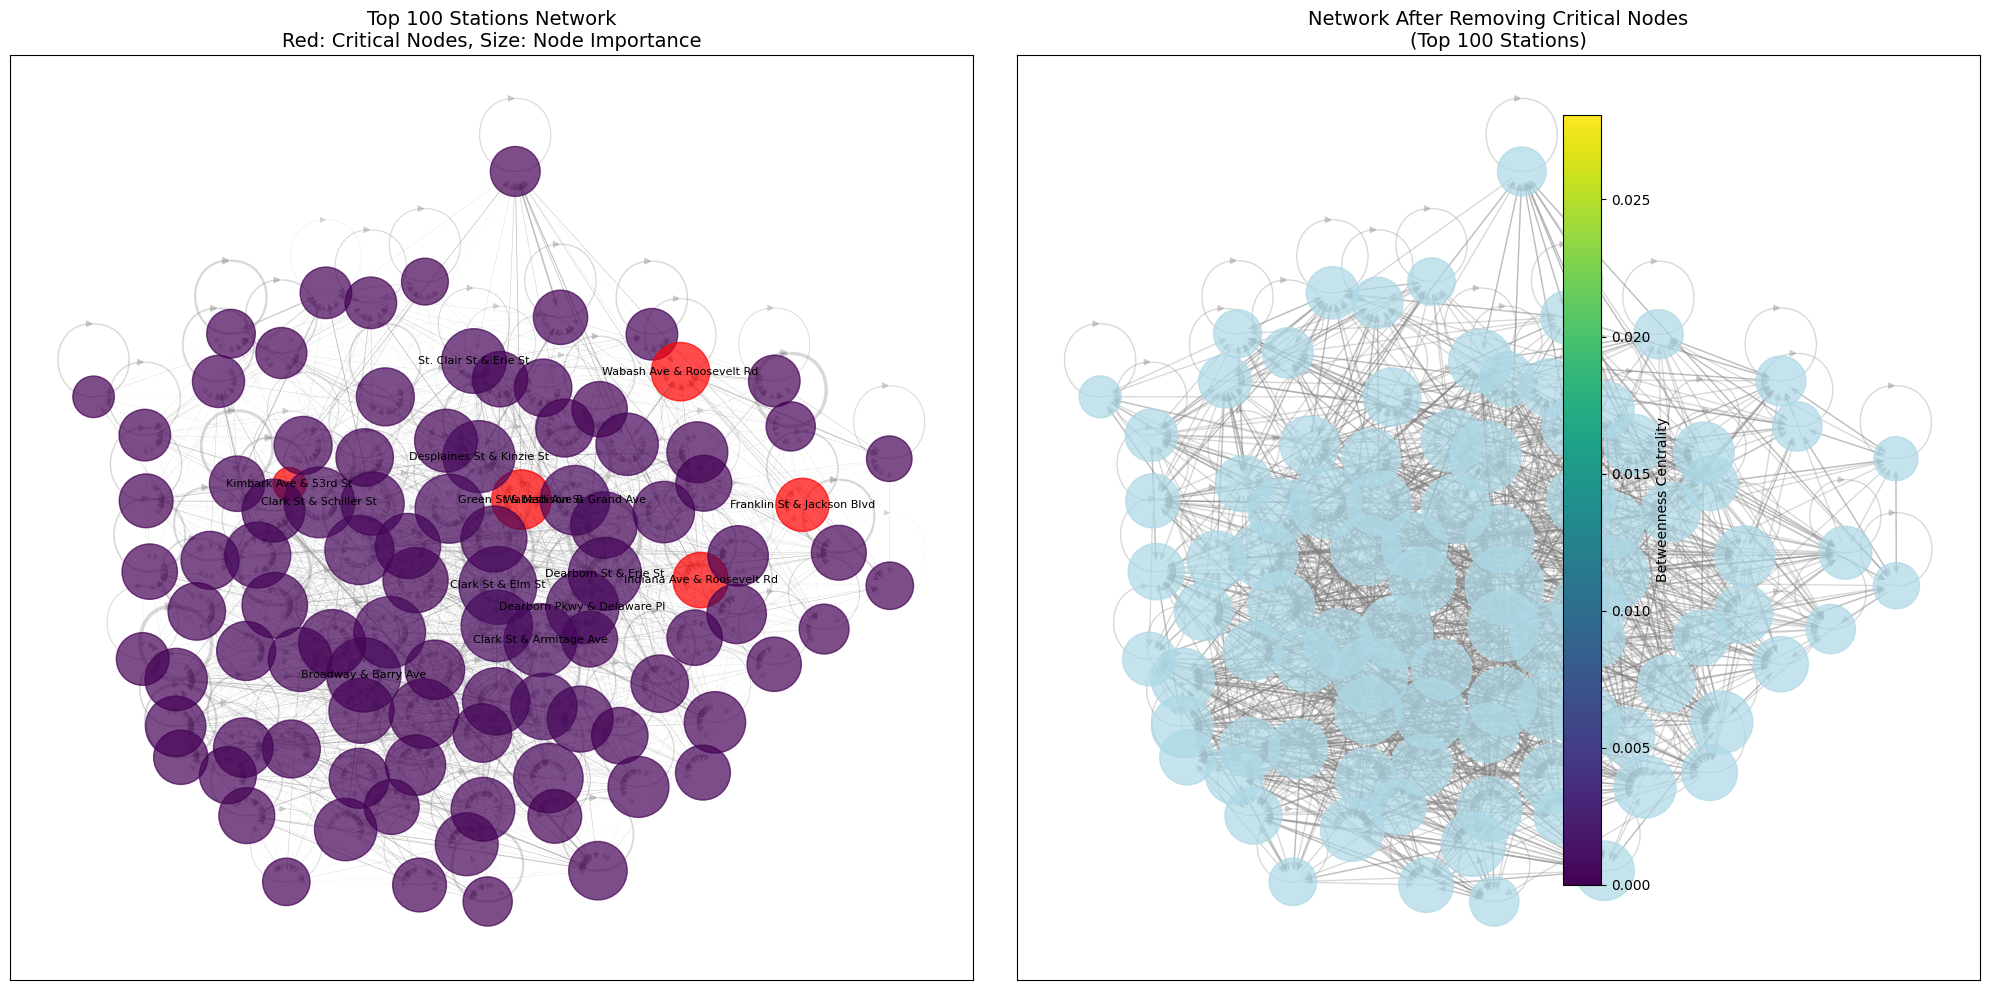

In [10]:
def visualize_top_stations_network(graph, modified_graph, critical_nodes, top_n=100):
    """
    Visualize network focusing on top stations by total traffic
    
    Parameters:
        graph: Original network graph
        modified_graph: Network after node removal
        critical_nodes: List of critical nodes
        top_n: Number of top stations to include
    """
    # Calculate total traffic for each station
    traffic = {}
    for node in graph.nodes():
        in_traffic = sum(w.get('weight', 0) for _, _, w in graph.in_edges(node, data=True))
        out_traffic = sum(w.get('weight', 0) for _, _, w in graph.out_edges(node, data=True))
        traffic[node] = in_traffic + out_traffic
    
    # Get top stations
    top_stations = sorted(traffic.items(), key=lambda x: x[1], reverse=True)[:top_n]
    top_station_names = set(node for node, _ in top_stations)
    
    # Create subgraphs with only top stations
    top_graph = graph.subgraph(top_station_names)
    top_modified = modified_graph.subgraph(top_station_names - set(critical_nodes))
    
    # Visualization
    fig = plt.figure(figsize=(20, 10))
    
    # Calculate metrics for subgraph
    degree_centrality = nx.degree_centrality(top_graph)
    betweenness_centrality = nx.betweenness_centrality(top_graph)
    
    # Use Kamada-Kawai layout for better visualization
    pos = nx.kamada_kawai_layout(top_graph)
    
    # Plot original network
    ax1 = plt.subplot(1, 2, 1)
    
    # Edge weights
    edge_weights = [top_graph[u][v].get('weight', 1) for u, v in top_graph.edges()]
    max_weight = max(edge_weights) if edge_weights else 1
    normalized_weights = [w/max_weight * 3 for w in edge_weights]  # Increased line width
    
    # Node sizes
    node_sizes = [3000 * degree_centrality[node] + 500 for node in top_graph.nodes()]
    
    # Node colors
    node_colors = []
    for node in top_graph.nodes():
        if node in critical_nodes:
            node_colors.append('red')
        else:
            node_colors.append(plt.cm.viridis(betweenness_centrality[node]))
    
    # Draw original network
    nx.draw_networkx_edges(top_graph, pos, alpha=0.3, 
                          width=normalized_weights, 
                          edge_color='gray',
                          arrowsize=10)
    nodes = nx.draw_networkx_nodes(top_graph, pos, 
                                 node_size=node_sizes,
                                 node_color=node_colors,
                                 alpha=0.7)
    
    # Labels for critical nodes and top 10 stations
    top_10_stations = set(node for node, _ in top_stations[:10])
    labels = {node: node for node in top_graph.nodes() 
             if node in critical_nodes or node in top_10_stations}
    nx.draw_networkx_labels(top_graph, pos, labels, font_size=8)
    
    plt.title(f"Top {top_n} Stations Network\nRed: Critical Nodes, Size: Node Importance", 
              fontsize=14)
    
    # Plot modified network
    ax2 = plt.subplot(1, 2, 2)
    
    # Modified network metrics
    mod_degree_centrality = nx.degree_centrality(top_modified)
    mod_node_sizes = [3000 * mod_degree_centrality[node] + 500 
                     for node in top_modified.nodes()]
    
    # Draw modified network
    nx.draw_networkx_edges(top_modified, pos, alpha=0.3,
                          edge_color='gray',
                          arrowsize=10)
    nx.draw_networkx_nodes(top_modified, pos,
                          node_size=mod_node_sizes,
                          node_color='lightblue',
                          alpha=0.7)
    
    plt.title(f"Network After Removing Critical Nodes\n(Top {top_n} Stations)", 
              fontsize=14)
    
    # Add colorbar
    norm = plt.Normalize(min(betweenness_centrality.values()), 
                        max(betweenness_centrality.values()))
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=[ax1, ax2], label='Betweenness Centrality')
    
    plt.tight_layout()
    return fig

# Print station statistics before visualization
def print_station_stats(graph, top_n=100):
    """Print statistics about the network before visualization"""
    total_stations = len(graph.nodes())
    total_routes = len(graph.edges())
    total_trips = sum(w.get('weight', 0) for _, _, w in graph.edges(data=True))
    
    print(f"Network Statistics:")
    print(f"Total Stations: {total_stations}")
    print(f"Total Routes: {total_routes}")
    print(f"Total Trips: {total_trips}")
    print(f"\nVisualization will show top {top_n} stations by traffic")

# Use the functions
print_station_stats(graph)
fig = visualize_top_stations_network(graph, graph_after_removal, critical_nodes)
plt.show()

# 2. Station Usage Analysis

## 2.1 Calculate Station Statistics

In [ ]:
# Calculate usage statistics for each station
station_usage = trip_data.groupby("start_station_name").size()\
                .rename("trips_started").to_frame()
station_usage["trips_ended"] = trip_data.groupby("end_station_name").size()
station_usage["trips_ended"].fillna(0, inplace=True)
station_usage["imbalance"] = station_usage["trips_started"] - \
                            station_usage["trips_ended"]

# Define thresholds for identifying problematic stations
HIGH_DEMAND = 50
LOW_DEMAND = -50

# Identify stations with supply-demand imbalance
high_demand = station_usage[station_usage["imbalance"] > HIGH_DEMAND]
low_demand = station_usage[station_usage["imbalance"] < LOW_DEMAND]

print("High Demand Stations:")
print(high_demand)
print("\nLow Demand Stations:")
print(low_demand)

High Demand Stations:
                                     trips_started  trips_ended  imbalance
start_station_name                                                        
Broadway & Ridge Ave                           237        185.0       52.0
Broadway & Sheridan Rd                         372        306.0       66.0
Canal St & Madison St                          154         86.0       68.0
Clark St & Lincoln Ave                         542        490.0       52.0
Clark St & Schiller St                         576        513.0       63.0
Columbus Dr & Randolph St                      538        423.0      115.0
Damen Ave & Division St                        242        172.0       70.0
Mies van der Rohe Way & Chestnut St            361        309.0       52.0
Sheridan Rd & Buena Ave                        268        195.0       73.0
Stockton Dr & Wrightwood Ave                   584        509.0       75.0
Wells St & Elm St                              523        469.0       54.0
Woo

/var/folders/ss/d266z7jd1vg00ngknmwb3lsw0000gn/T/ipykernel_12966/2287906921.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  station_usage["trips_ended"].fillna(0, inplace=True)


## 2.2 Visualize Station Usage Patterns

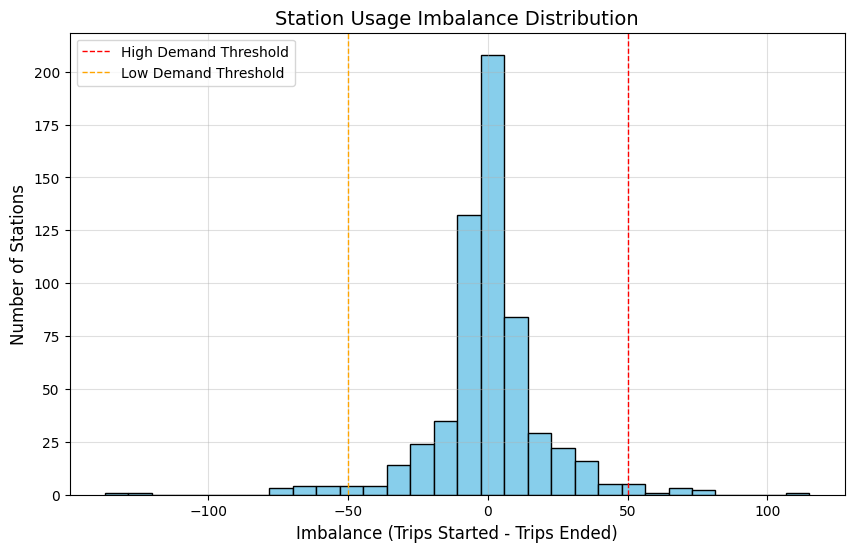

In [7]:
def plot_station_usage(station_usage, high_threshold, low_threshold):
    """
    Create distribution plot of station usage imbalance
    """
    plt.figure(figsize=(10, 6))
    plt.hist(station_usage["imbalance"], bins=30, 
            edgecolor="black", color="skyblue")
    plt.axvline(high_threshold, color="red", linestyle="dashed",
                linewidth=1, label="High Demand Threshold")
    plt.axvline(low_threshold, color="orange", linestyle="dashed",
                linewidth=1, label="Low Demand Threshold")
    plt.title("Station Usage Imbalance Distribution", fontsize=14)
    plt.xlabel("Imbalance (Trips Started - Trips Ended)", fontsize=12)
    plt.ylabel("Number of Stations", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.4)
    plt.show()

plot_station_usage(station_usage, HIGH_DEMAND, LOW_DEMAND)

# 3. Generate Optimization Recommendations

In [10]:
def generate_recommendations(critical_nodes, high_demand, low_demand):
    """
    Generate station optimization recommendations based on analysis
    """
    recommendations = []
    
    # Recommendations for critical nodes
    for node in critical_nodes:
        if node in high_demand.index:
            recommendations.append({
                "station": node,
                "status": "Critical & High Demand",
                "action": "Increase capacity and add backup stations"
            })
        elif node in low_demand.index:
            recommendations.append({
                "station": node,
                "status": "Critical & Low Demand",
                "action": "Optimize rebalancing schedule"
            })
            
    # Recommendations for non-critical problematic stations
    for station in high_demand.index:
        if station not in critical_nodes:
            recommendations.append({
                "station": station,
                "status": "High Demand",
                "action": "Increase capacity during peak hours"
            })
            
    for station in low_demand.index:
        if station not in critical_nodes:
            recommendations.append({
                "station": station,
                "status": "Low Demand",
                "action": "Consider reducing capacity or relocation"
            })
            
    return pd.DataFrame(recommendations)

recommendations_df = generate_recommendations(critical_nodes, 
                                           high_demand, low_demand)
print("Optimization Recommendations:")
print(recommendations_df)

Optimization Recommendations:
                                        station                 status  \
0                     Wabash Ave & Roosevelt Rd  Critical & Low Demand   
1                         Green St & Madison St  Critical & Low Demand   
2                          Broadway & Ridge Ave            High Demand   
3                        Broadway & Sheridan Rd            High Demand   
4                         Canal St & Madison St            High Demand   
5                        Clark St & Lincoln Ave            High Demand   
6                        Clark St & Schiller St            High Demand   
7                     Columbus Dr & Randolph St            High Demand   
8                       Damen Ave & Division St            High Demand   
9           Mies van der Rohe Way & Chestnut St            High Demand   
10                      Sheridan Rd & Buena Ave            High Demand   
11                 Stockton Dr & Wrightwood Ave            High Demand   
12      